# DataFrame

## DataFrame 结构

1. 行列二维数组
2. 行索引: `index`
3. 行索引名称
4. 列索引: `columns`
5. 列索引名称

## 创建 DataFrame

pd.DataFrame(data, index, columns, dtype, copy)

1. data: `可迭代对象`、`字典`、`Series`、`DataFrame`、`Numpy数组`
   - `可迭代对象`和`Numpy数组` 最外层数据中的每一个元素为一行，比如
     ```python
      zip(
         ['a', 'b', 'c'],
         [10, 20, 30],
         ['m', 'f', 'm']
      )
     ('a',10,'m')为一行
     ```
   - `字典` key 为列索引，value 为`DataFrame`中的行数据
   - `Series`
     ```python
      pd.DataFrame(
         (
            pd.Series(
                  ('a', 10, 'm'),
                  index=('name', 'age', 'sex'),
                  name=pd.Timestamp('2024-01-01'),
            ),
            pd.Series(
                  ('b', 20, 'f'),
                  index=('name', 'age', 'sex'),
                  name=pd.Timestamp('2024-01-02'),
            ),
            pd.Series(
                  ('c', 30, 'm'),
                  index=('name', 'age', 'sex'),
                  name=pd.Timestamp('2024-01-03'),
            ),
         )
      )
      pd.DataFrame(
         {
            'name': pd.Series(
                  ['a', 'b', 'c'],
                  index=pd.date_range('2024', periods=3, name='date')
            ),
            'age': pd.Series(
                  [10, 20, 30], 
                  index=pd.date_range('2024', periods=3, name='date')
            ),
            'sex': pd.Series(
                  ['m', 'f', 'm'], 
                  index=pd.date_range('2024', periods=3, name='date')
            ),
         }
      )
     ```
     输出结果都为  
      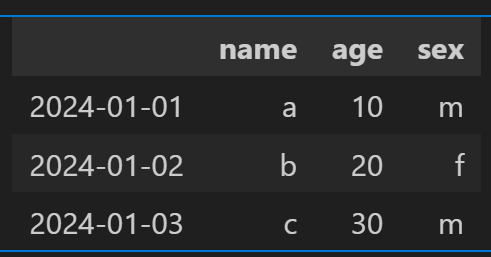
   - `DataFrame` 会继承原`DataFrame`的索引
2. index: 可迭代对象、Series、Numpy 数组、日期 Index
   - 可省略，生成整数索引
   - `Series` `name`会作为`index.name`
3. columns: 可迭代对象、Series、Numpy 数组
   - 可省略，生成整数索引
   - `Series` `name`会作为`index.name`
4. dtype: 数据类型
   - 可省略
5. copy: 是否复制数据
   - 可省略


In [8]:
import pandas as pd
import numpy as np

pd.DataFrame(
    data=[('a', 10, 'm'), ('b', 20, 'f'), ('c', 30, 'm')],
    index=pd.date_range('2024', periods=3, name='date'),
    columns=pd.Series(['name', 'age', 'sex'], name='cols'),
    dtype='str',
    copy=False,
)

cols,name,age,sex
date,,,
2024-01-01,a,10,m
2024-01-02,b,20,f
2024-01-03,c,30,m


In [10]:
pd.DataFrame(
    (
        pd.Series(
            ('a', 10, 'm'),
            index=('name', 'age', 'sex'),
            name=pd.Timestamp('2024-01-01'),
        ),
        pd.Series(
            ('b', 20, 'f'),
            index=('name', 'age', 'sex'),
            name=pd.Timestamp('2024-01-02'),
        ),
        pd.Series(
            ('c', 30, 'm'),
            index=('name', 'age', 'sex'),
            name=pd.Timestamp('2024-01-03'),
        ),
    )
)

,name,age,sex
2024-01-01,a,10,m
2024-01-02,b,20,f
2024-01-03,c,30,m


In [11]:
pd.DataFrame(
    pd.Series(
        ('a', 10, 'm'), index=('name', 'age', 'sex'), name=pd.Timestamp('2024-01-01')
    )
)

,2024-01-01
name,a
age,10
sex,m


In [12]:
pd.DataFrame(
    {
        'name': pd.Series(
            ['a', 'b', 'c'], index=pd.date_range('2024', periods=3, name='date')
        ),
        'age': pd.Series(
            [10, 20, 30], index=pd.date_range('2024', periods=3, name='date')
        ),
        'sex': pd.Series(
            ['m', 'f', 'm'], index=pd.date_range('2024', periods=3, name='date')
        ),
    }
)

,name,age,sex
date,,,
2024-01-01,a,10,m
2024-01-02,b,20,f
2024-01-03,c,30,m


In [13]:
pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]))

,0,1,2
0,1,2,3
1,4,5,6
